<a href="https://colab.research.google.com/github/MacraeSmith/helloAI/blob/main/Assignment5theano2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat ~/.keras/keras.json
!cat nn3/keras.json > ~/.keras/keras.json
!git clone "https://github.com/kartoone/nn3"
#!git pull


{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}cat: nn3/keras.json: No such file or directory
Cloning into 'nn3'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 188 (delta 42), reused 29 (delta 12), pack-reused 109
Receiving objects: 100% (188/188), 94.38 MiB | 20.46 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (108/108), done.


In [ ]:

!cat nn3/keras.json > ~/.keras/keras.json
!pip uninstall -y keras
!pip uninstall -y tensorflow
!pip install tensorflow==2.2
!pip install keras==2.2.4
!pip install pydot-ng
!pip install theano==0.8
%cd nn3/src


  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-0.8.0-py3-none-any.whl size=2722137 sha256=596f70d9130f914b420fc49c10a6f2778430abce6dad5f43d31fec5e40e3e382
  Stored in directory: /root/.cache/pip/wheels/46/fa/00/251dbd5e561228175439939ac67c8c17484f615a245c2479d8
Successfully built theano
/content/nn3/src


In [ ]:
%cd nn3/src

import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
training_data, validation_data, test_data = network3.load_data_shared()
mini_batch_size = 10
net = Network([
        FullyConnectedLayer(n_in=784, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 60, mini_batch_size, 0.1, 
            validation_data, test_data)


[Errno 2] No such file or directory: 'nn3/src'
/content/nn3/src
Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 0.9256000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9204000000000001
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Epoch 1: validation accuracy 0.9438000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9402
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Epoch 2: validation accuracy 0.9538000000000002
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9506000000000001
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch 

In [ ]:
import numpy as np

# assumes batch size of 10
def findTroublesomeImage(net, test_data, batchsize=10):
  batches = int(len(test_data[1].eval())/batchsize)
  print(batches)
  worsta = 1.0
  worsti = 0
  for i in range(batches):
    outputs = net.test_mb_outputs(i)
    for a in outputs:
      if np.max(a)<worsta:
        worsta = np.max(a)
        worsti = i
  return (worsti, worsta)

1000
792
0.33106068
2
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 19, 39, 28, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 190, 207, 146, 97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 198, 252, 161, 247, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 102, 253, 253, 253, 244, 193, 35, 5, 39, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 46, 224, 253, 253, 253, 253, 215, 152, 253, 218, 138, 72, 0, 0, 0, 0,

array([[2.10151110e-14, 9.99900281e-01, 2.65018874e-09, 2.45518379e-07,
        2.60682960e-08, 2.74178183e-06, 2.34013342e-07, 1.23693397e-07,
        9.63487400e-05, 1.39669325e-08],
       [1.87226316e-14, 9.99828100e-01, 2.78612031e-08, 2.97162643e-07,
        6.27731083e-07, 8.63345129e-09, 3.13173217e-07, 4.45060941e-05,
        1.26140105e-04, 5.92527538e-09],
       [1.71432042e-13, 2.99585010e-11, 6.47779085e-13, 7.46084999e-11,
        9.99998927e-01, 2.94612363e-07, 1.28444200e-09, 6.60396404e-10,
        2.91895674e-07, 4.71046519e-07],
       [3.72850328e-09, 7.32095350e-06, 9.99075353e-01, 3.83260522e-06,
        9.11113515e-04, 1.81367259e-08, 2.13609951e-06, 1.49706046e-11,
        6.88079069e-08, 1.55685271e-07],
       [4.33799386e-14, 5.84480450e-11, 2.88147956e-12, 2.15936296e-07,
        2.59982753e-05, 6.71937419e-12, 1.45552295e-14, 5.16360821e-09,
        2.71885270e-08, 9.99973774e-01],
       [3.24811671e-11, 2.31963284e-08, 1.34201471e-07, 4.17675710e-06,
   

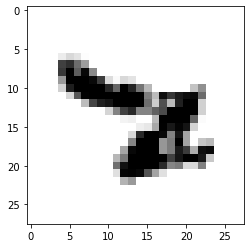

In [ ]:
import matplotlib.pyplot as plt

(worsti, worsta) = findTroublesomeImage(net, test_data)
print(worsti)
print(worsta)

print(test_data[1][4176].eval())
pixeldata = test_data[0][4176].reshape((28,28)).eval()
pixeldata = [[round(p*255) for p in pix] for pix in pixeldata]
print(pixeldata)
plt.figure()
plt.imshow(pixeldata, cmap="gray_r")
net.test_mb_outputs(417)


In [ ]:
!pip show theano

Name: Theano
Version: 0.8.0
Summary: Optimizing compiler for evaluating mathematical expressions on CPUs and GPUs.
Home-page: http://deeplearning.net/software/theano/
Author: LISA laboratory, University of Montreal
Author-email: theano-dev@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy, scipy, six
Required-by: 


In [ ]:
!python expand_mnist.py

Expanding the MNIST training set
Expanding image number 1000
Expanding image number 2000
Expanding image number 3000
Expanding image number 4000
Expanding image number 5000
Expanding image number 6000
Expanding image number 7000
Expanding image number 8000
Expanding image number 9000
Expanding image number 10000
Expanding image number 11000
Expanding image number 12000
Expanding image number 13000
Expanding image number 14000
Expanding image number 15000
Expanding image number 16000
Expanding image number 17000
Expanding image number 18000
Expanding image number 19000
Expanding image number 20000
Expanding image number 21000
Expanding image number 22000
Expanding image number 23000
Expanding image number 24000
Expanding image number 25000
Expanding image number 26000
Expanding image number 27000
Expanding image number 28000
Expanding image number 29000
Expanding image number 30000
Expanding image number 31000
Expanding image number 32000
Expanding image number 33000
Expanding image num

In [ ]:
from network3 import ReLU
import time
start = time.time()
expanded_training_data, _, _ = network3.load_data_shared(
        "../data/mnist_expanded.pkl.gz")
net = Network([
        ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(expanded_training_data, 60, mini_batch_size, 0.03, 
            validation_data, test_data, lmbda=0.1)
finish = time.time()
elapsed = finish - start
print(elapsed)

Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Training mini-batch number 9000
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Training mini-batch number 13000
Training mini-batch number 14000
Training mini-batch number 15000
Training mini-batch number 16000
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-batch number 19000
Training mini-batch number 20000
Training mini-batch number 21000
Training mini-batch number 22000
Training mini-batch number 23000
Training mini-batch number 24000
Epoch 0: validation accuracy 0.9876000000000001
This is the best validation accuracy to date.
The corresponding test accuracy is 0.9904000000000001
Training mini-batch number 25000
Trainin